In [10]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.count import CountEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn-11-1-3/telco.csv


In [12]:
data= pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')

In [13]:
# Reading the Data
# data = pd.read_csv('telco.csv')

In [14]:
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [15]:
data.shape

(7043, 50)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [17]:
# data.iloc[:,19:47]

In [18]:
# checking for missing values 

missing_val = data.isna().sum()/len(data) *100
missing_val[missing_val > 0]

Offer             55.047565
Internet Type     21.666903
Churn Category    73.463013
Churn Reason      73.463013
dtype: float64

In [19]:
# Columns with missing values
cols_with_missing_val = ['Offer','Internet Type','Churn Category',
      'Churn Reason']

for col in cols_with_missing_val:
    print(f' {col}:  {data[col].unique()}\n')

 Offer:  [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']

 Internet Type:  ['DSL' 'Fiber Optic' 'Cable' nan]

 Churn Category:  ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]

 Churn Reason:  ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']



In [20]:
data['Tenure in Months'].unique()

array([ 1,  8, 18, 25, 37, 27, 58, 15,  7, 11,  3, 13, 16, 24,  4, 32, 54,
        2, 21, 55,  5, 20, 65, 49, 43, 56, 52, 33, 30, 46,  9, 10, 35, 44,
       62, 14, 12, 17, 39, 68, 34, 22, 19, 23, 42, 41, 57, 38, 29, 66, 69,
       40, 31, 59, 36, 45, 53, 70, 47, 50, 51, 72, 26,  6, 28, 48, 61, 71,
       60, 64, 67, 63])

In [21]:
# Providing the range  for months columns to show them as tenure in years
data['Tenure in Years'] =  pd.cut(x=data['Tenure in Months'], bins=range(0,73,12), labels=range(1,7,)).astype(int)

# Filling the missing values
data[['Churn Reason','Churn Category']] = data[['Churn Reason','Churn Category']].fillna('not churned')
data[['Offer','Internet Type']] = data[['Offer','Internet Type']].fillna('None')


In [22]:
missing_val = data.isna().sum().sort_values(ascending=False)
missing_val[missing_val > 0]

Series([], dtype: int64)

## EDA

#### Univariate Analysis

* Churn Count For Customers

<Axes: xlabel='Churn Label', ylabel='count'>

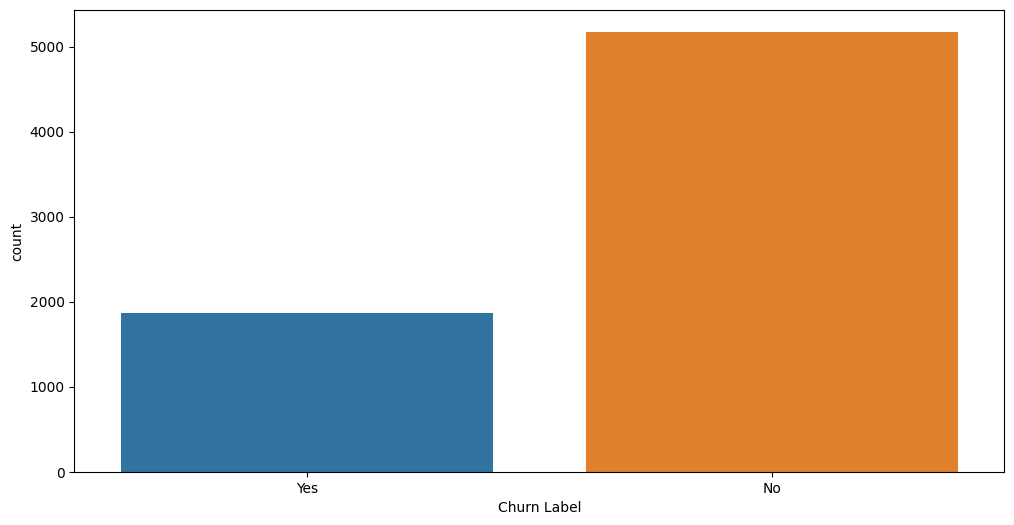

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Churn Label')

In [24]:
data['Churn Category'].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude',
       'not churned'], dtype=object)

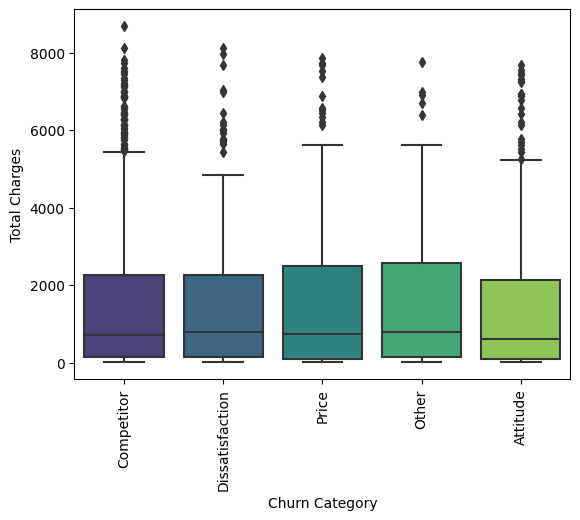

In [25]:
churn_cat_data = data[data['Churn Category'] != 'not churned']
sns.boxplot(data=churn_cat_data,x='Churn Category',y='Total Charges',palette='viridis')
plt.xticks(rotation =90);

* From the above graph, it is observed that the length and width of the box is slightly (very tiny) is higher for **Price** and **Other**  than that of **Competitors** , **Dissatisfaction** and **Attitude**. And the data is skewed when the churn category is equal to **Competitor**

In [26]:
# data.groupby(data['Churn Category'] =='Competitor')['Total Charges'].max()

In [27]:
# data[data['Total Charges'] == 8684.80]['Churn Category']

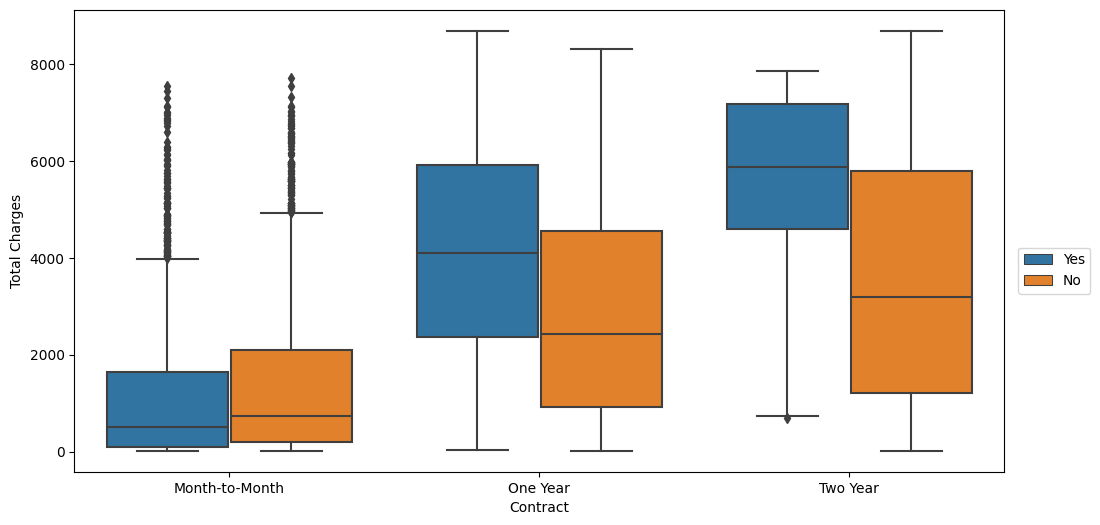

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='Contract',y='Total Charges',hue='Churn Label')
plt.legend(bbox_to_anchor=(1.1, 0.5))

From the above plot it is observed that higher total charges are generally associated with higher churn rates as shown in **One Year** and **Two Year** Contract type. The influence of **Month-to-Month** contract shows that higher churn rate with lower median total chagres whereas long-term contracts like ony-year and two year tend to have churned customer with highere median total charges.Overall the plot suggest that customers on month-to-month contracts might need more motivation to stay, whereas customers on longer-term contracts who are paying higher charges might benefit from loyalty programs or discounts to reduce churn.

<Axes: xlabel='Internet Type', ylabel='Total Charges'>

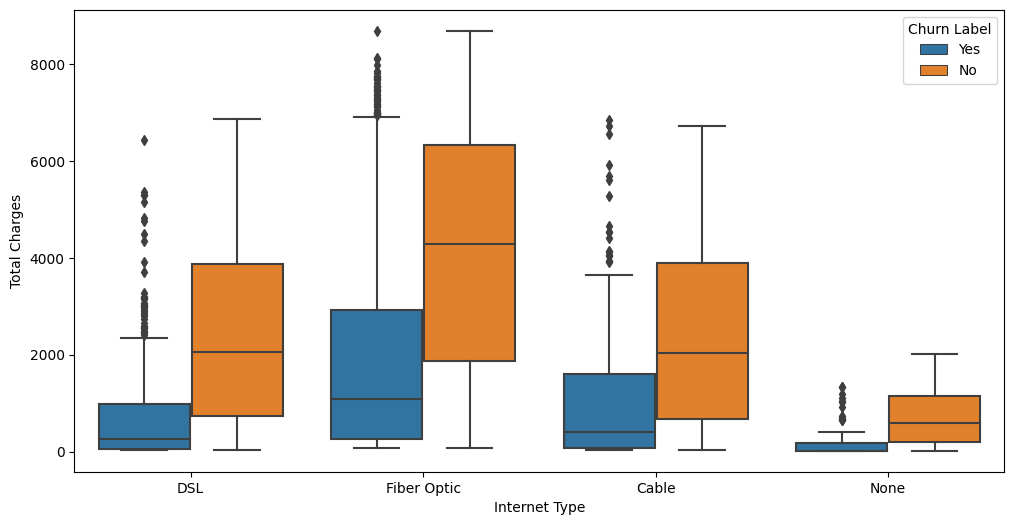

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='Internet Type',y='Total Charges',hue='Churn Label')

From the above plot, it is observed that higher total charges are generally associated with higher churn rates as shown in **Fiber Optic** and **Cable** Internet type. The **Fiber Optic** Internet Type shows higher churn rate with lower median total charges as compared to **Cable** and **DSL**.
The customer's are prefering **Fiber Optic** Ineternet type than **Cable** and **DSL** irrespactive of churning.

<Axes: xlabel='Internet Service', ylabel='Total Charges'>

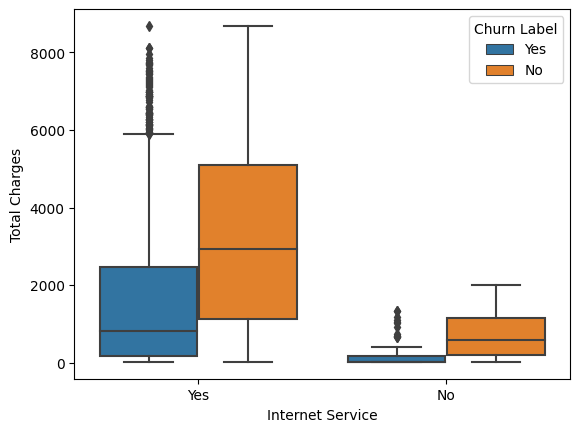

In [30]:
sns.boxplot(data=data,x='Internet Service',y='Total Charges',hue='Churn Label')

From the above plot ,it is observed that there are more outlier's in when there is internet service.This indicates that there is higher variablity in total charges among the Customers

<Axes: xlabel='Total Charges', ylabel='Total Revenue'>

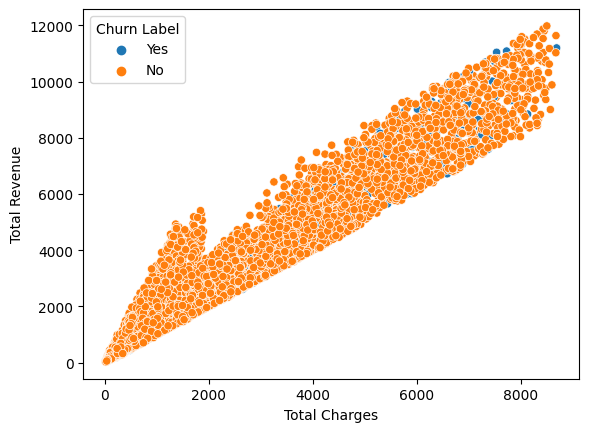

In [31]:
sns.scatterplot(data=data,x='Total Charges',y='Total Revenue',hue='Churn Label')

From above plot it is observed that the there is positive correlation between total charges and total revenue as it given that the total charges contribute to the total revenue.And the churned customers are relatively lower in number.

<Axes: xlabel='Customer Status', ylabel='count'>

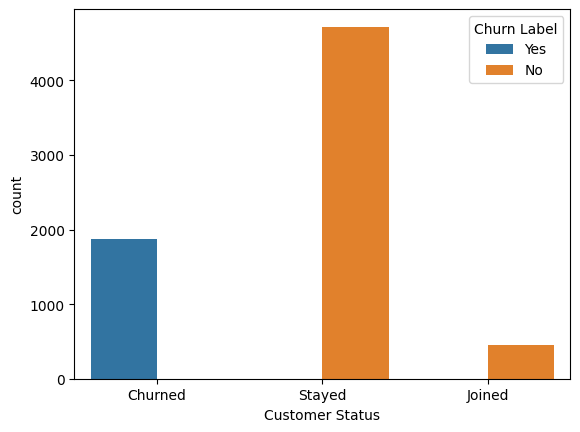

In [32]:
sns.countplot(data=data,x='Customer Status',hue='Churn Label')

From above graph it is observed that the majority of customer have stayed with service indicating high retention rate.But the count of newly joined customer is relatively to that of churned.

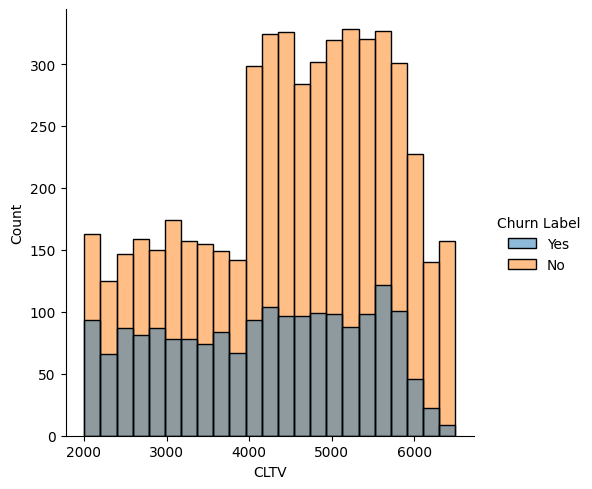

In [33]:
sns.displot(data=data,x='CLTV',hue='Churn Label')

CLTV means he value a customer contributes to your business over the entire lifetime at particular company. In the above it shows that customer are staying for the services.

In [34]:
col_list = []
for col in data.columns:
    col =col.lower().replace(" ",'_')
    col_list.append(col)

data.columns = col_list

In [35]:
data.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'country', 'state', 'city',
       'zip_code', 'latitude', 'longitude', 'population', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'customer_status', 'churn_label',
       'churn_score', 'cltv', 'churn_category', 'churn_reason',
       'tenure_in_years'],
      dtype='object')

In [36]:
corr_df= pd.get_dummies(data[['gender','under_30', 'senior_citizen', 'married','dependents','phone_service','multiple_lines',
       'internet_service', 'internet_type','avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'customer_status','churn_category','churn_reason',
       'churn_label']],dtype=int,drop_first=True).corr()

In [37]:
corr_df['churn_label_Yes'].sort_values(ascending=False).iloc[1:-1]

churn_category_Competitor                                 0.612690
churn_reason_Competitor had better devices                0.358817
churn_reason_Competitor made better offer                 0.357616
churn_category_Dissatisfaction                            0.352777
churn_reason_Attitude of support person                   0.298767
churn_category_Price                                      0.292399
churn_category_Other                                      0.284446
internet_type_Fiber Optic                                 0.279623
churn_reason_Don't know                                   0.228164
internet_service_Yes                                      0.227890
churn_reason_Competitor offered more data                 0.216252
churn_reason_Competitor offered higher download speeds    0.199680
paperless_billing_Yes                                     0.191825
churn_reason_Price too high                               0.176074
churn_reason_Product dissatisfaction                      0.17

Text(0.5, 0, 'Correlated Features')

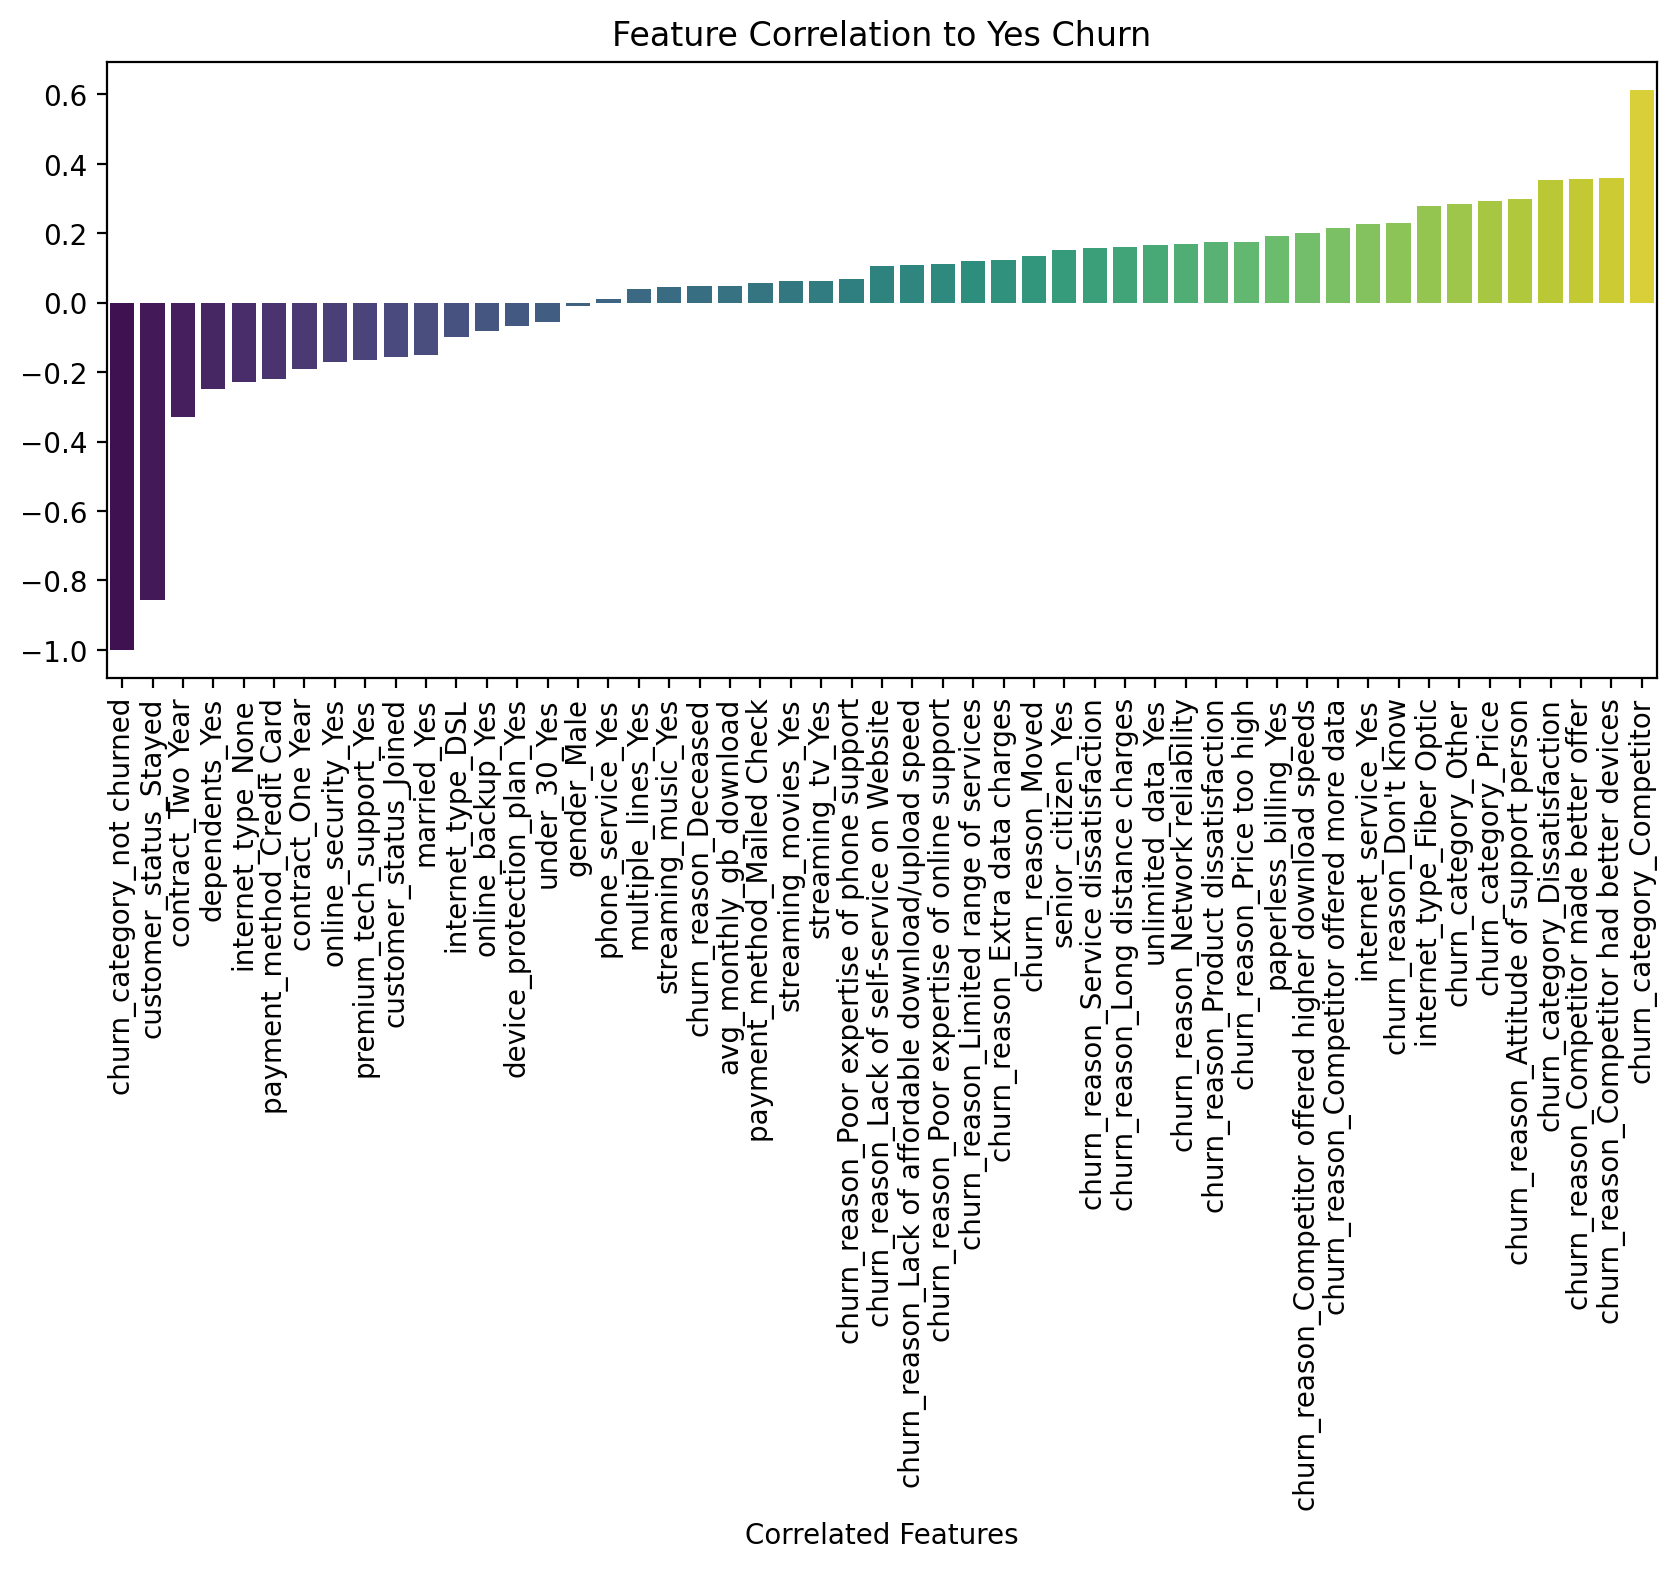

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['churn_label_Yes'].sort_values().iloc[1:-1].index,y=corr_df['churn_label_Yes'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);
plt.xlabel('Correlated Features')

In [39]:
no_churn = data.groupby(['churn_label','tenure_in_years']).count().transpose()['No']
yes_churn = data.groupby(['churn_label','tenure_in_years']).count().transpose()['Yes']

churn_rate = 100 * yes_churn / no_churn + yes_churn
churn_rate.transpose()['customer_id']

tenure_in_years
1    1127.252393
2     334.273973
3     207.607362
4     168.500810
5     136.853933
6     100.077626
Name: customer_id, dtype: float64

Text(0.5, 0, 'Tenure In Years')

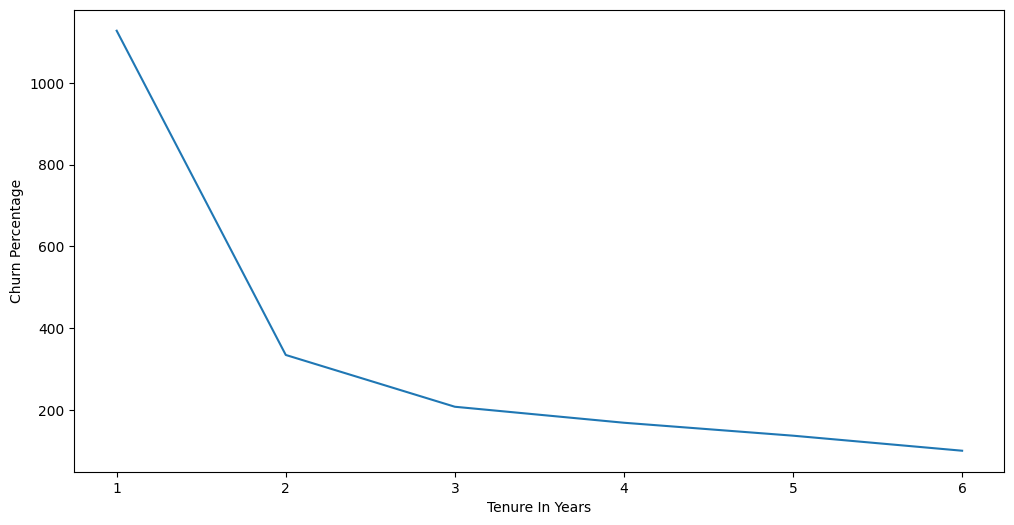

In [40]:
plt.figure(figsize=(12,6))
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');
plt.xlabel('Tenure In Years')

In [41]:
data.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'under_30', 'senior_citizen', 'married',
       'dependents', 'country', 'state', 'city', 'quarter',
       'referred_a_friend', 'offer', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'customer_status', 'churn_label',
       'churn_category', 'churn_reason'],
      dtype='object')

In [42]:
# features
new_df= data.drop(['customer_id','country','state','zip_code','latitude',
        'longitude','quarter','customer_status','churn_score',
        'cltv','churn_category','churn_reason'],axis=1)


In [43]:
new_df.shape

(7043, 39)

In [44]:

count_encoder = CountEncoder()
new_df['city'] = count_encoder.fit_transform(new_df['city'])

In [45]:
new_df['gender'] = new_df['gender'].map({'Male':1,'Female':0})
new_df['churn_label'] = new_df['churn_label'].map({'Yes':1,'No':0})


In [46]:
# Seprating Features into Independent and dependent Features
X= new_df.drop('churn_label',axis=1)
y = new_df['churn_label']

In [47]:
ordinal_features = ['internet_type','contract','payment_method']
nominal_features = ['under_30', 'senior_citizen', 'married', 'dependents',
       'referred_a_friend', 'offer', 'phone_service', 'multiple_lines',
       'internet_service', 'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing']

numeric_features = list(X.select_dtypes(include=int).columns)

In [48]:

# enc = OrdinalEncoder()
# ohe_enc = OneHotEncoder()


ordinal_encoder = Pipeline([('ordinal_encoding',OrdinalEncoder()),
                            ('scaler',MinMaxScaler())])
one_hot_encoder = Pipeline([('nominal_encoding',OneHotEncoder(drop='first'))])

numeric_scaling = Pipeline([('scaler',MinMaxScaler())])


ct = ColumnTransformer(transformers=[('ordinal',ordinal_encoder,ordinal_features),
                                     ('nominal',one_hot_encoder,nominal_features),
                                     ('numeric',numeric_scaling,numeric_features)],remainder='passthrough')
X = ct.fit_transform(X)






# new_df[nominal_features] = ohe_enc.fit_transform(new_df[nominal_features])
# new_df[['internet_type','contract']] = enc.fit_transform(new_df[['internet_type','contract']])

In [49]:
X

array([[3.33333333e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.96500000e+01],
       [6.66666667e-01, 0.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 3.90800000e+02, 1.02410000e+03],
       [6.66666667e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.56100000e+01, 2.03940000e+02, 1.91088000e+03],
       ...,
       [6.66666667e-01, 5.00000000e-01, 5.00000000e-01, ...,
        4.53800000e+01, 2.13552000e+03, 9.45304000e+03],
       [3.33333333e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.72400000e+01, 0.00000000e+00, 3.19210000e+02],
       [6.66666667e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.04336000e+03, 8.88786000e+03]])

In [50]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: churn_label, Length: 7043, dtype: int64

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.30)

In [52]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)
log_y_pred = log_reg.predict(X_test)
print('LogisticRegression Accuracy Score: ',accuracy_score(log_y_pred,y_test))

LogisticRegression Accuracy Score:  0.955040227165168


* Cross Validation using LogisticRegressionCV

In [53]:
# from sklearn.linear_model import LogisticRegressionCV
# log_cv = LogisticRegressionCV(max_iter=10000,cv=5)
# log_cv.fit(X_train,y_train)
# log_cv_ypred = log_cv.predict(X_test)
# print('LogisticRegressionCV Accuracy Score: ',accuracy_score(log_cv_ypred,y_test));

In [54]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train,y_train)
# rf_y_pred = rf_model.predict(X_test)
# print('RandomForest Accuracy Score', accuracy_score(rf_y_pred,y_test))

In [55]:
# RandomForest Accuracy Score 0.9616658778987222
# sticRegressionCV Accuracy Score:  0.9564600094652154

In [56]:
models  = {'rf':RandomForestClassifier(),
                    'xgb':XGBClassifier(),
                    'knn':KNeighborsClassifier()}

In [57]:

results={}
for name,model in models.items():
    results[name]= cross_validate(model,X_train,y_train,scoring='roc_auc',cv=5)

print(results)




{'rf': {'fit_time': array([0.79783154, 0.75197697, 0.760638  , 0.75434566, 0.75756359]), 'score_time': array([0.02853751, 0.02644062, 0.02684021, 0.02581048, 0.02696514]), 'test_score': array([0.9782933 , 0.98540234, 0.98785637, 0.977405  , 0.98899021])}, 'xgb': {'fit_time': array([0.28545761, 0.30932736, 0.18325615, 0.17902923, 0.19201303]), 'score_time': array([0.00909543, 0.00668311, 0.00721383, 0.0064981 , 0.00644994]), 'test_score': array([0.98959344, 0.98955126, 0.99482308, 0.98903463, 0.99365761])}, 'knn': {'fit_time': array([0.00316381, 0.00266147, 0.00267982, 0.00275326, 0.00283551]), 'score_time': array([0.07912707, 0.02022934, 0.02114463, 0.02012157, 0.02037787]), 'test_score': array([0.71086205, 0.70837902, 0.68917907, 0.68542027, 0.71306712])}}


In [58]:
rf_model = results['rf']['test_score']
knn_model = results['knn']['test_score']
xgb_model = results['xgb']['test_score']

In [59]:
model_df = pd.DataFrame(data=[rf_model,knn_model,xgb_model],index=['rf','knn','xgb'])
model_df

,0,1,2,3,4
rf,0.978293,0.985402,0.987856,0.977405,0.988990
knn,0.710862,0.708379,0.689179,0.685420,0.713067
xgb,0.989593,0.989551,0.994823,0.989035,0.993658


In [60]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_y_pred = xgb.predict(X_test)
print('XGBClassifier Training Accuracy Score',xgb.score(X_train,y_train))
print('XGBClassifier Accuracy Score',accuracy_score(xgb_y_pred,y_test))

XGBClassifier Training Accuracy Score 1.0
XGBClassifier Accuracy Score 0.9630856601987695


In [61]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
grid_model = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, scoring='roc_auc',gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid=param_test1, cv=5)

grid_model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:05:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:05:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:05:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:05:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:05:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, Use

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)})

In [62]:
best_model = grid_model.best_estimator_
best_model.fit(X_train,y_train)
best_model_ypred = best_model.predict(X_test)
print('Tunned XGBClassifier for Training Data Accuracy',best_model.score(X_train,y_train))
print('Tunned XGBClassifier for Testing Data Accuracy',accuracy_score(best_model_ypred,y_test))

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:05:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)


Tunned XGBClassifier for Training Data Accuracy 1.0
Tunned XGBClassifier for Testing Data Accuracy 0.966871746332229


In [63]:

# plot_confusion_matrix(best_model,X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
# plot_precision_recall_curve(best_model,X_test,y_test)

In [ ]:
# plot_roc_curve(best_model,X_test,y_test)

In [ ]:
# https://medium.com/analytics-vidhya/different-types-of-hyper-parameter-tuning-3d99ca624baa

In [64]:
data.shape

(7043, 51)